    v1.1 2018/10/23 JLC Ajout image architecture réseau + correction fautes de frappe
    v1.2 2019/06/13 BA  MAJ par Benjamin AILLOUD (stage L2 informatique)
    v2.0 2019/06/16 JLC Reformulation version 2.

# Machine learning : les module Python Keras & tensorflow pour la conception & l'entrainnement d'un réseau de neuronnes dédié à la reconnaissance de chiffres écrits à la main 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

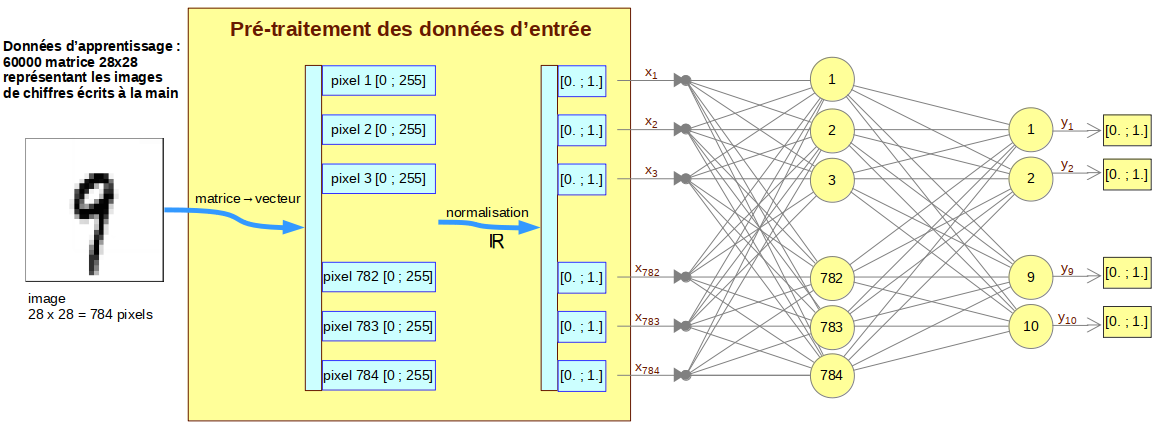

In [2]:
Image(filename="./images/archiReseau.png")

# Prérequis

### Installation des paquets Python :
Dans une console de commande ("*fenêtre prompt Anaconda*" pour Windows, ou "*terminal*" pour Mac OS X ou GNU/Linux), taper la commande :

    conda install keras
    
Importer le module `keras`et vérifier sa version (doit être 2.x.y) :    

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

La documentation Keras est disponible sur https://keras.io.

Lecture des images avec openCV<br />
Si le module `openCV` n'est pas installé, il faut taper dans la "fenêtre prompt anaconda" (Windows) ou dans le "terminal" (Mac Os X ou GNU/Linux) :

    conda install -c anaconda openCV
    
Tester en important le module `cv2`...  

In [4]:
import cv2
cv2.__version__

'3.4.2'

# Travail à faire

## 1/ Récupération du jeu de données MNIST :

https://fr.wikipedia.org/wiki/Base_de_données_MNIST : La base de données MNIST (*Mixed National Institute of Standards and Technology*), est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.<br /><br />
L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

In [ ]:
# Load data from https://www.openml.org/d/554
from keras.datasets import mnist
(image_train, etiq_train), (image_test, etiq_test) = mnist.load_data() 

<span style="color:blue;font-family:arial">Faire afficher le type des objets `image_train`, `etiq_train`, `image_test` et `etiq_test` :</span>

<span style="color:blue;font-family:arial">Faire afficher l'attribut `shape` des tableaux `image_train`, `etiq_train`, `image_test` et `etiq_test` -> interpréter les réponses :</span>

<span style="color:blue;font-family:arial">Faire afficher le type des tableaux `image_train`, `etiq_train`, `image_test` et `etiq_test` -> interpréter les réponses :</span>

### 1.1/ Vérification des étiquettes des données : 

<span style="color:blue;font-family:arial">Faire afficher les 100 premières valeurs de `etiq_train` et `etiq_test` ; interpréter les réponses. </span>

### 1.2/ Visualisation des images  :

<span style="color:blue;font-family:arial;">Avec la fonction `imshow` du module matplotlib.pyplot faire afficher l'image de rang 600 dans le tableau `image_train`.<br />
Indications :<br />
- utiliser `plt.figure(figsize=(5,5))`;<br />
- passer l'argument `cmap='binary'` à la fonction `imshow`;<br/>
- enlever les graduations en X et Y avec l'instruction  `plt.xticks([]); plt.yticks([])`.</span>

<span style="color:blue;font-family:arial">Vérifier que l'étiquette associée à `image_train[600]` est bien `9` :</span>

<span style="color:blue;font-family:arial">Écrire une fonction `plotImage` qui prend les arguments qui vont bien pour afficher les images MNIST commençant au rang `r` sur `L` lignes et `C` colonnes (utiliser `plt.subplot`). La figure affichée doit avoir pour dimensions 10 x 10 pouces.

<span style="color:blue;font-family:arial">Fait afficher 100 images à partir de la 600 ème dans une grille de 10x10 : </span>

## 2/ Pré-traitement des données

Pour adapter les données au réseau de neurones, on doit transformer les matrice d'entiers `uint8` représentant les images 24 x 24 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1.$

### Transformation des matrices d'entrée en vecteurs normalisés :

In [ ]:
nb_image_train, nb_image_test = image_train.shape[0], image_test.shape[0]
nb_pixels = image_train.shape[1] * image_train.shape[2]   # 28 x 28 = 784 pixels

# mise 'à plat' des matrices sous forme de vecteurs de floats 
# Indications: utiliser les méthodes 'reshape(new_shape)' et astype('float32') de ndarray).
x_train = image_train.reshape((nb_image_train, nb_pixels)).astype('float32')
x_test  = image_test.reshape((nb_image_test, nb_pixels)).astype('float32')

# normalisation des tableaux X_train et X_test :
x_train = x_train/255
x_test  = x_test/255

<span style="color:blue;font-family:arial">Vérifier la tailles des tableaux `x_train` et `x_test`  :</span>

In [ ]:
x_train.shape, x_test.shape

### 'Hot coding' des réponses :

Les étiquettes des images sont des valeurs entières comprises entre 0 et 9. Pour traiter efficacement le problème de classification, on utilise la technique de `hot encoding` qui remplace les valeurs des différentes classes par une suite de données binaires. <br />Pour cela on utilise la fonction `to_categorical` du module `keras.utils.np_utils` :

In [ ]:
from keras.utils.np_utils import to_categorical
# 'hot encoding' des sorties :
y_train = to_categorical(etiq_train)
y_test  = to_categorical(etiq_test)

<span style="color:blue;font-family:arial">Faire afficher les 10 premières valeurs de `etiq_train` et les 10 premières valeurs `hot encoded` de `y_train` :</span>

## 3/ Construction du réseau de neurones :

On va maintenant construire un réseau de neurone séquentiel (cf https://keras.io/models/sequential ) en quelques lignes à l'aide des modules **keras** et **tensorflow**. Les spécifications du réseau de neurones à construire sont :
- les entrées sont constituées des données des 784 pixels mis sous forme de vecteur normalisé ;
- le réseau de neurones comporte une couche de 784 neurones, avec pour chaque neurone la fonction d'activation `retified linear units` (cf https://keras.io/activations ) ;
- la couche de sortie est constituée de 10 neurones utilisant la fonction d'activation `softmax` pour convertir les sorties en valeur de probalibilités permettant de choisir une des 10 classes ;
- `Logarithmic loss` est utilisé comme fonction de perte (dans Keras elle est apellée `called categorical_crossentropy`) ;
- l'algorithme de descente de gradient ADAM est utilisé pour l'optimisation des poids des neurones par rétro-progation de l'erreur. 

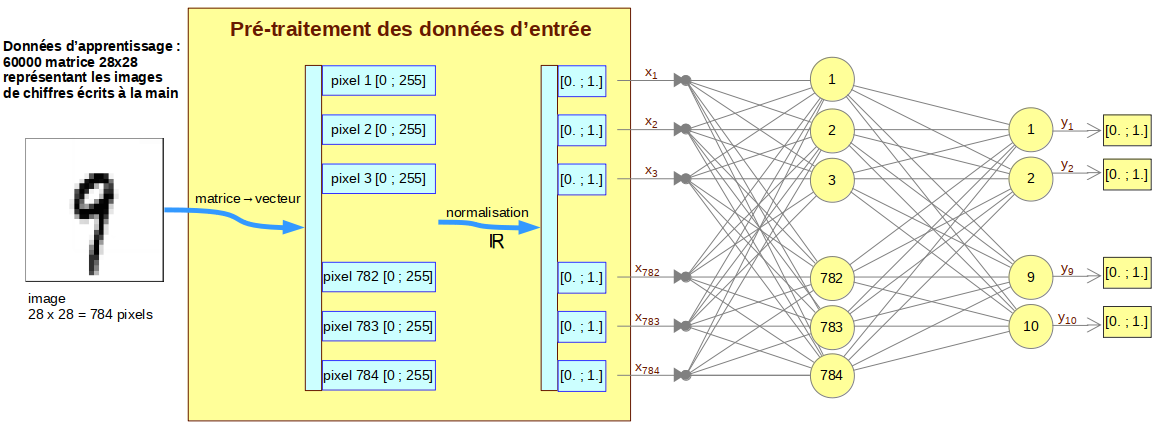

In [3]:
Image(filename="./images/archiReseau.png")

La **fonction d'erreur** (*loss function*) utilisée pour quantifier l'erreur entre la sortie du réseau et la sortie prévue est disponible dans keras sous le nom `categorical_crossentropy`:

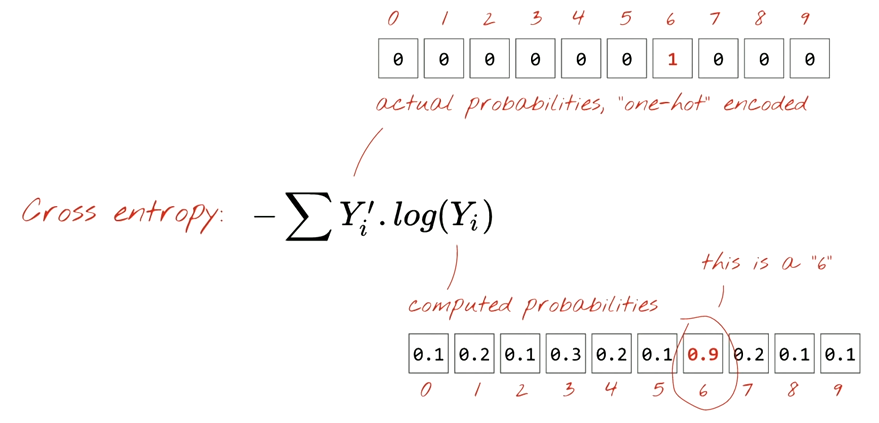

In [4]:
Image(filename="./images/CrossEntropy.png", width=650)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 

nb_classes = len(y_train[0])

model = Sequential()
model.add(Dense(nb_pixels, input_dim=nb_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

## 4/ Entrainnement du réseau :

Le modèle est entraîné 10 fois, avec mises à jour des poids toutes les 200 images, en utilisant les données d'entrée  (images) `x_train` et les données de sortie (étiquettes) `y_train` :

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

Tracé des courbes `accuracy` et `loss` :

In [ ]:
def plot(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,2,1)
    ax1.plot(history.history['acc'], 'o-',label='Train')
    ax1.plot(history.history['val_acc'], 'o-', label='Test')
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch') 
    ax1.grid()
    ax1.legend(loc='best')
    # Plot training & validation loss values
    ax2 = plt.subplot(1,2,2)
    ax2.plot(history.history['loss'], 'o-', label='Train')
    ax2.plot(history.history['val_loss'], 'o-',  label='Test')
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='best')
    ax2.grid()
    plt.show()

In [ ]:
plot(history)

##### Entrainer le réseau plus longtemps (augmentation du nombre d'epochs) peut permettre d'aumgenter les performances du réseau 


## 5/ Vérication de l'apprentissage ....

La méthode `predict`permet de demander au modèle sa prédiction pour une ou plusieurs entrées.<BR />
Exemple de prédition pour une image test numéro i dans le jeu d'images de test (0 <= i <= 10000) :

In [ ]:
i = 1000
rep = model.predict(x_test[i:i+1])

np.set_printoptions(formatter={'float':'{:0.4f}'.format})
print("valeur trouvée par le réseau de neurones :", rep[0])

np.set_printoptions(formatter={'float':'{:0.1f}'.format})
print("valeur trouvée arrondie  : {}".format(rep[0]))
print("rep[0].argmax() donne    : {}".format(rep[0].argmax()))

plt.figure(figsize=(1,1))
digit = image_test[i]
plt.xticks([]); plt.yticks([])
plt.imshow(digit, cmap='binary');
print(f"\nLa bonne réponse est {etiq_test[i]}, soit en 'hot coded' : {y_test[i]}")

<span style="color:blue;font-family:arial">Écrire les instructions Python pour calculer avec les données de test le pourcentage d'erreur du réseau entrainé.... <br/> 
Conseil: la variable rep contient pour chaque image une liste de 10 probabilités, il pourra être utile d'utiliser la fonction argmax de la librairie numpy pour obtenir le chiffre de plus haute probabilité.</span>


### Modifions notre modèle vers une architecture multi couche



In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 

nb_classes = len(y_train[0])

model2 = Sequential()

model2.add(Dense(784, input_dim=nb_pixels, kernel_initializer='normal', activation='relu'))
model2.add(Dense(300, kernel_initializer='normal', activation='relu'))
model2.add(Dense(100, kernel_initializer='normal', activation='relu'))
model2.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model2`, faire afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [ ]:
model2.summary()

In [ ]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

In [ ]:
plot(history2)

<span style="color:blue;font-family:arial"> Augmenter le nombre de couches a t'il un impact sur les performances du réseau (> 98.5%) ? Que peut on conclure sur l'utilité de complexifier ce type de réseau ? </span>

À priori, on peut voir que cela n'a pas un grand impact, la reconnaissance lors des tests tourne toujours autour des 98%, il est donc peu utile de complexifier ce type de réseau.

# Utiliser le réseau avec ses propres images

In [ ]:
import os
images = ['chiffres/'+f for f in os.listdir('chiffres') if f.endswith(".png") or f.endswith(".jpg")]
print("Liste des images envoyées : {}".format(images))

In [ ]:
import cv2
# lecture des images -> matrices ndarray 28x28 
input_data = [255-cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype  # on doit avoir 4 matrices de 28 x 28 valeurs 

In [ ]:
plt.figure(figsize=(15,4))
for i,M in enumerate(input_data):  
    plt.subplot(1,12,i+1)
    plt.imshow(input_data[i], cmap='binary');
    plt.xticks([]); plt.yticks([])

In [ ]:
nb_images = input_data.shape[0]
# mise 'à plat' des matrices sous forme de vecteurs de floats :
x_photo = input_data.reshape(nb_images, 28*28).astype('float32')
# normalisation des données :
x_photo /= 255

In [ ]:
rep = model.predict(x_photo)
np.set_printoptions(formatter={'float': '{:0.3f}'.format})
print(rep)

In [ ]:
[r.argmax() for r in rep]

In [ ]:
rep = model2.predict(x_photo)
np.set_printoptions(formatter={'float': '{:0.3f}'.format})
print(rep)

In [ ]:
[r.argmax() for r in rep]

Pour améliorer les performances du réseau il est nécessaire de changer d'architecture pour passer sur des réseaux de types
**convolutionnels**.